# HRデータサイエンティスト練習問題
## 1. 離職意向のデータを用いて、以下のようなグラフを作成してください。
## 2. それぞれのグラフを見て、どのようなことが言えるかを書きましょう。

In [2]:
from pandas import read_csv
data = read_csv("../data/attrition/WA_Fn-UseC_-HR-Employee-Attrition.csv")
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [3]:
target = "Attrition"

In [4]:
feature_by_dtype = {}
for c in data.columns:
    
    if c == target: continue
    
    data_type = str(data[c].dtype)
    
    if data_type not in feature_by_dtype.keys():
         feature_by_dtype[data_type] = [c]
    else:
        feature_by_dtype[data_type].append(c)

feature_by_dtype
feature_by_dtype.keys()

dict_keys(['int64', 'object'])

In [5]:
objects = feature_by_dtype["object"]

In [6]:
remove = ["Over18"]

In [7]:
categorical_features = [f for f in objects if f not in remove]

In [8]:
int64s = feature_by_dtype["int64"]

In [9]:
remove.append("StandardHours")
remove.append("EmployeeCount")

In [10]:
count_features = []
for i in [i for i in int64s if len(data[i].unique()) < 20 and i not in remove]:
    count_features.append(i)

In [11]:
count_features = count_features #+ ["TotalWorkingYears", "YearsAtCompany", "HourlyRate"]

In [12]:
remove.append("EmployeeNumber")

In [13]:
numerical_features = [i for i in int64s if i not in remove]

In [14]:
data[numerical_features].head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2


In [15]:
def display_ttest(data, category, numeric):
    output = {}
    s1 = data[data[category] == data[category].unique()[0]][numeric]
    s2 = data[data[category] == data[category].unique()[1]][numeric]
    from scipy.stats import ttest_ind
    t, p = ttest_ind(s1,s2)
    from IPython.display import display
    from pandas import DataFrame
    display(DataFrame(data=[{"t-test statistic" : t, "p-value" : p}], columns=["t-test statistic", "p-value"], index=[category]).round(2))

def display_ztest(data, category, numeric):
    output = {}
    s1 = data[data[category] == data[category].unique()[0]][numeric]
    s2 = data[data[category] == data[category].unique()[1]][numeric]
    from statsmodels.stats.weightstats import ztest
    z, p = ztest(s1,s2)
    from IPython.display import display
    from pandas import DataFrame
    display(DataFrame(data=[{"z-test statistic" : z, "p-value" : p}], columns=["z-test statistic", "p-value"], index=[category]).round(2))
    
def display_cxn_analysis(data, category, numeric, target):
    
    from seaborn import boxplot, kdeplot, set_style, distplot, countplot
    from matplotlib.pyplot import show, figure, subplots, ylabel, xlabel, subplot, suptitle
    
    not_target = [a for a in data[category].unique() if a != target][0]
    
    pal = {target : "yellow",
          not_target : "darkgrey"}
    

    set_style("whitegrid")
    figure(figsize=(12,5))
    suptitle(numeric + " by " + category)

    # ==============================================
    
    p1 = subplot(2,2,2)
    boxplot(y=category, x=numeric, data=data, orient="h", palette = pal)
    p1.get_xaxis().set_visible(False)

    # ==============================================
    
    if(numeric in count_features):
        p2 = subplot(2,2,4)
        
        s2 = data[data[category] == not_target][numeric]
        s2 = s2.rename(not_target) 
        countplot(s2, color = pal[not_target])
        
        s1 = data[data[category] == target][numeric]
        s1 = s1.rename(target)
        ax = countplot(s1, color = pal[target])
        
        ax.set_yticklabels([ "{:.0f}%".format((tick/len(data)) * 100) for tick in ax.get_yticks()])
        
        ax.set_ylabel("Percentage")
        ax.set_xlabel(numeric)
        
    else:
        p2 = subplot(2,2,4, sharex=p1)
        s1 = data[data[category] == target][numeric]
        s1 = s1.rename(target)
        kdeplot(s1, shade=True, color = pal[target])
        #distplot(s1,kde=False,color = pal[target])

        s2 = data[data[category] == not_target][numeric]
        s2 = s2.rename(not_target)  
        kdeplot(s2, shade=True, color = pal[not_target])
        #distplot(s2,kde=False,color = pal[not_target])

        #ylabel("Density Function")
        ylabel("Distribution Plot")
        xlabel(numeric)
    
    # ==============================================
    
    p3 = subplot(1,2,1)
    from seaborn import pointplot
    from matplotlib.pyplot import rc_context

    with rc_context({'lines.linewidth': 0.8}):
        pp = pointplot(x=category, y=numeric, data=data, capsize=.1, color="black", marker="s")
        
    
    # ==============================================
    
    show()
    
    #display p value
    
    if(data[category].value_counts()[0] > 30 and data[category].value_counts()[1] > 30):
        display_ztest(data,category,numeric)
    else:
        display_ttest(data,category,numeric)
    
    #Means, Standard Deviation, Absolute Distance
    table = data[[category,numeric]]
    
    means = table.groupby(category).mean()
    stds = table.groupby(category).std()
    
    s1_mean = means.loc[data[category].unique()[0]]
    s1_std = stds.loc[data[category].unique()[0]]
    
    s2_mean = means.loc[data[category].unique()[1]]
    s2_std = means.loc[data[category].unique()[1]]
    
    print("%s Mean: %.2f (+/- %.2f)" % (category + " == " + str(data[category].unique()[0]),s1_mean, s1_std))
    print("%s Mean : %.2f (+/- %.2f)" % (category + " == " + str(data[category].unique()[1]), s2_mean, s2_std))
    print("Absolute Mean Diferrence Distance: %.2f" % abs(s1_mean - s2_mean))

In [16]:
def get_p_value(s1,s2):
    
    from statsmodels.stats.weightstats import ztest
    from scipy.stats import ttest_ind
    
    if(len(s1) > 30 & len(s2) > 30):
        z, p = ztest(s1,s2)
        return p
    else:
        t, p = ttest_ind(s1,s2)
        return p
    
def get_p_values(data, category, numerics):
    
    output = {}
    
    for numeric in numerics:
        s1 = data[data[category] == data[category].unique()[0]][numeric]
        s2 = data[data[category] == data[category].unique()[1]][numeric]
        row = {"p-value" : get_p_value(s1,s2)}
        output[numeric] = row
    
    from pandas import DataFrame
    
    return DataFrame(data=output).T

def get_statistically_significant_numerics(data, category, numerics):
    df = get_p_values(data, category, numerics)
    return list(df[df["p-value"] < 0.05].index)

def get_statistically_non_significant_numerics(data, category, numerics):
    df = get_p_values(data, category, numerics)
    return list(df[df["p-value"] >= 0.05].index)
    
def display_p_values(data, category, numerics):
    from IPython.display import display
    display(get_p_values(data, category, numerics).round(2).sort_values("p-value", ascending=False))

In [17]:
significant = get_statistically_significant_numerics(data,target,numerical_features) 
ns = get_statistically_non_significant_numerics(data,target,numerical_features)

In [18]:
i = iter(significant)

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


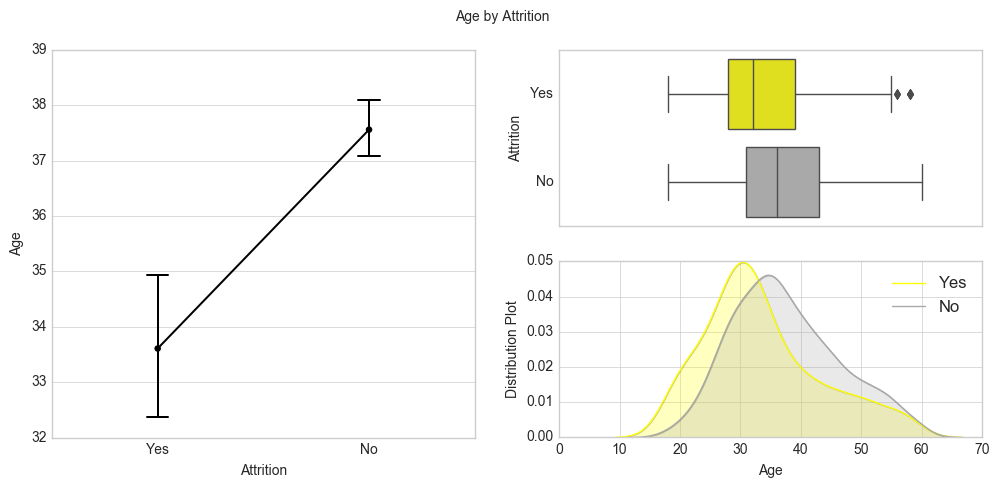

,z-test statistic,p-value
Attrition,-6.18,0.0


Attrition == Yes Mean: 33.61 (+/- 9.69)
Attrition == No Mean : 37.56 (+/- 37.56)
Absolute Mean Diferrence Distance: 3.95


In [19]:
display_cxn_analysis(data, target, next(i), "Yes")

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


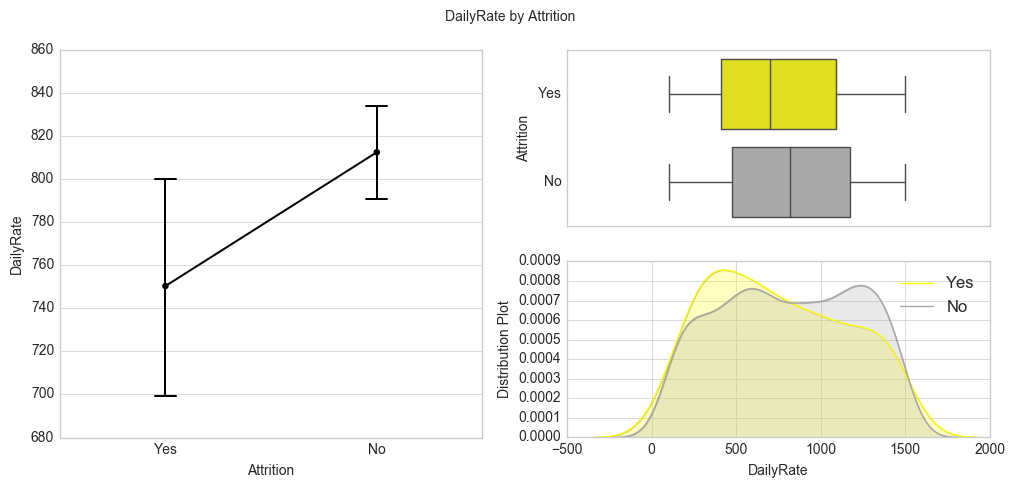

,z-test statistic,p-value
Attrition,-2.17,0.03


Attrition == Yes Mean: 750.36 (+/- 401.90)
Attrition == No Mean : 812.50 (+/- 812.50)
Absolute Mean Diferrence Distance: 62.14


In [20]:
display_cxn_analysis(data, target, next(i), "Yes")

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


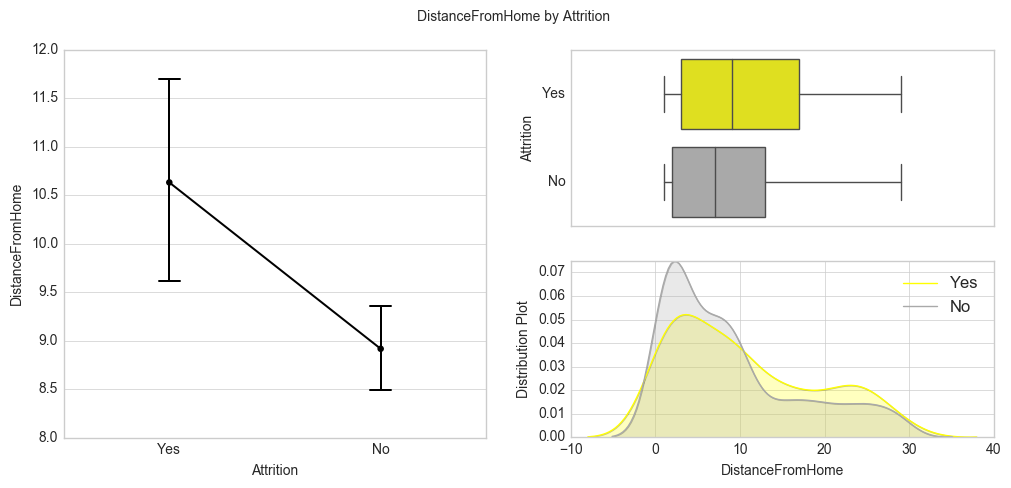

,z-test statistic,p-value
Attrition,2.99,0.0


Attrition == Yes Mean: 10.63 (+/- 8.45)
Attrition == No Mean : 8.92 (+/- 8.92)
Absolute Mean Diferrence Distance: 1.72


In [21]:
display_cxn_analysis(data, target, next(i), "Yes")

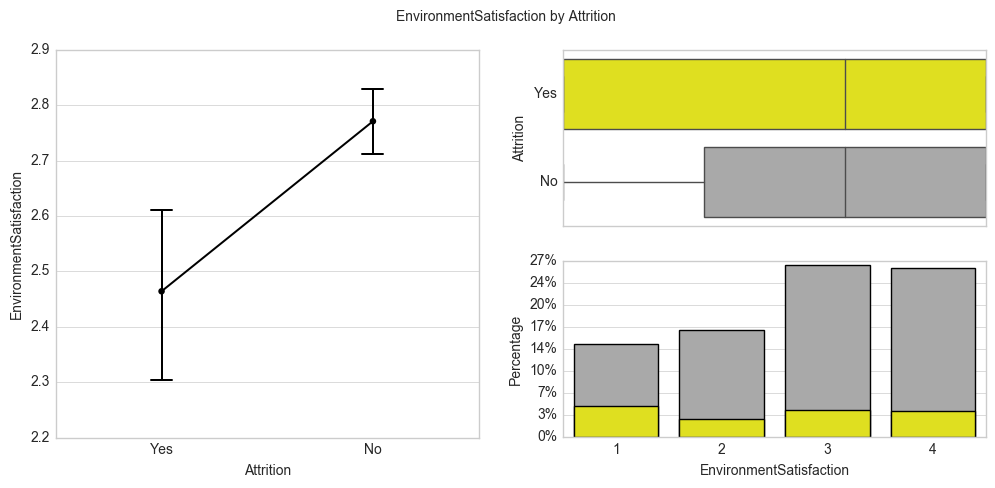

,z-test statistic,p-value
Attrition,-3.98,0.0


Attrition == Yes Mean: 2.46 (+/- 1.17)
Attrition == No Mean : 2.77 (+/- 2.77)
Absolute Mean Diferrence Distance: 0.31


In [22]:
display_cxn_analysis(data, target, next(i), "Yes")

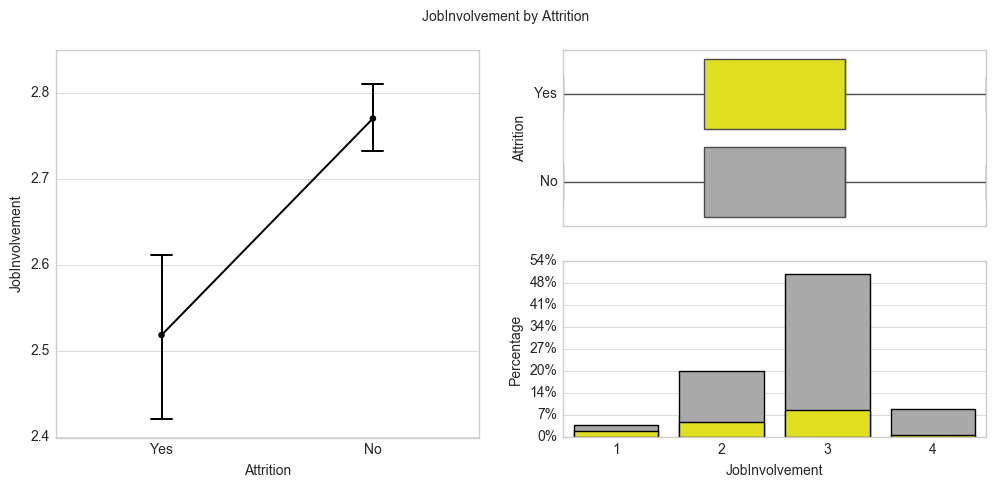

,z-test statistic,p-value
Attrition,-5.02,0.0


Attrition == Yes Mean: 2.52 (+/- 0.77)
Attrition == No Mean : 2.77 (+/- 2.77)
Absolute Mean Diferrence Distance: 0.25


In [23]:
display_cxn_analysis(data, target, next(i), "Yes")

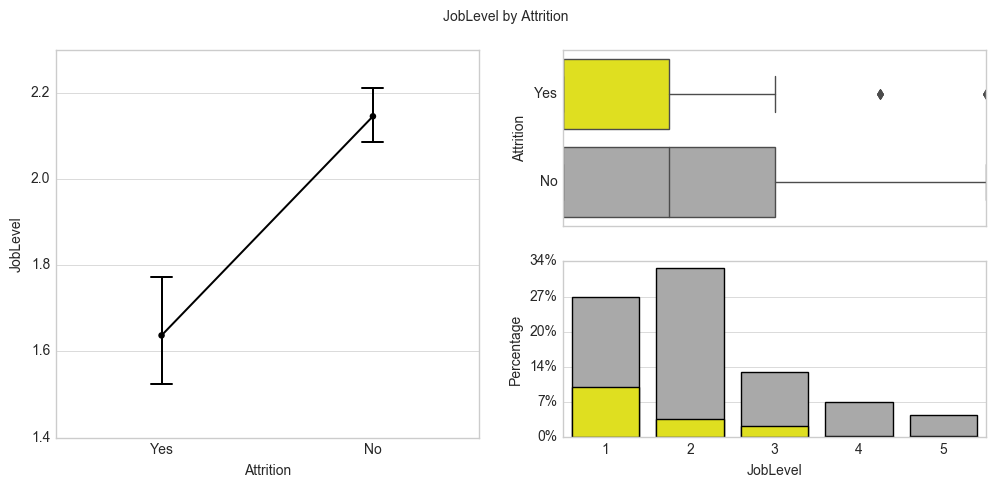

,z-test statistic,p-value
Attrition,-6.57,0.0


Attrition == Yes Mean: 1.64 (+/- 0.94)
Attrition == No Mean : 2.15 (+/- 2.15)
Absolute Mean Diferrence Distance: 0.51


In [24]:
display_cxn_analysis(data, target, next(i), "Yes")

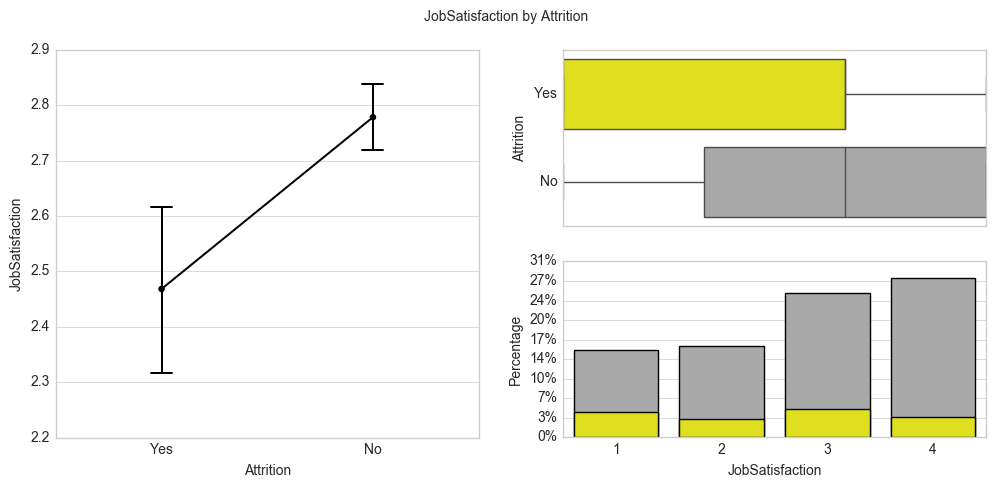

,z-test statistic,p-value
Attrition,-3.99,0.0


Attrition == Yes Mean: 2.47 (+/- 1.12)
Attrition == No Mean : 2.78 (+/- 2.78)
Absolute Mean Diferrence Distance: 0.31


In [25]:
display_cxn_analysis(data, target, next(i), "Yes")

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


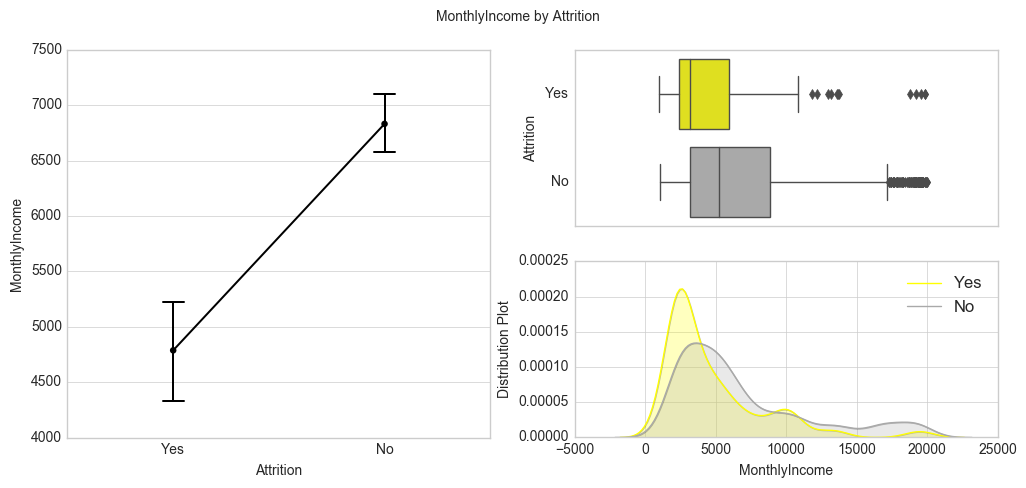

,z-test statistic,p-value
Attrition,-6.2,0.0


Attrition == Yes Mean: 4787.09 (+/- 3640.21)
Attrition == No Mean : 6832.74 (+/- 6832.74)
Absolute Mean Diferrence Distance: 2045.65


In [26]:
display_cxn_analysis(data, target, next(i), "Yes")

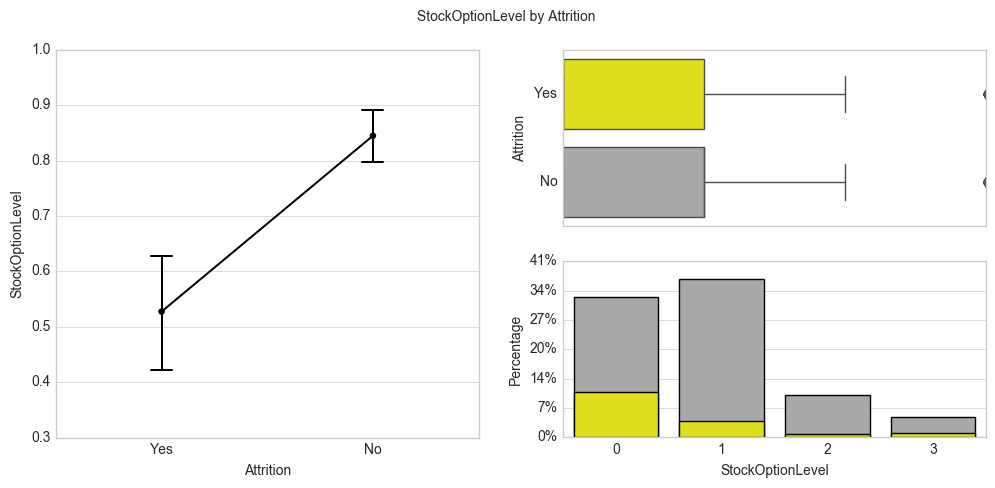

,z-test statistic,p-value
Attrition,-5.3,0.0


Attrition == Yes Mean: 0.53 (+/- 0.86)
Attrition == No Mean : 0.85 (+/- 0.85)
Absolute Mean Diferrence Distance: 0.32


In [27]:
display_cxn_analysis(data, target, next(i), "Yes")

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


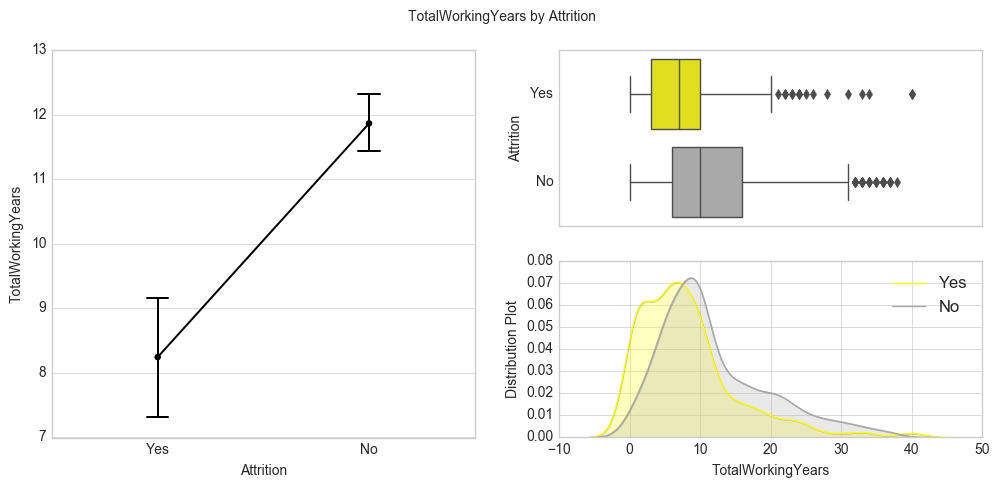

,z-test statistic,p-value
Attrition,-6.65,0.0


Attrition == Yes Mean: 8.24 (+/- 7.17)
Attrition == No Mean : 11.86 (+/- 11.86)
Absolute Mean Diferrence Distance: 3.62


In [28]:
display_cxn_analysis(data, target, next(i), "Yes")

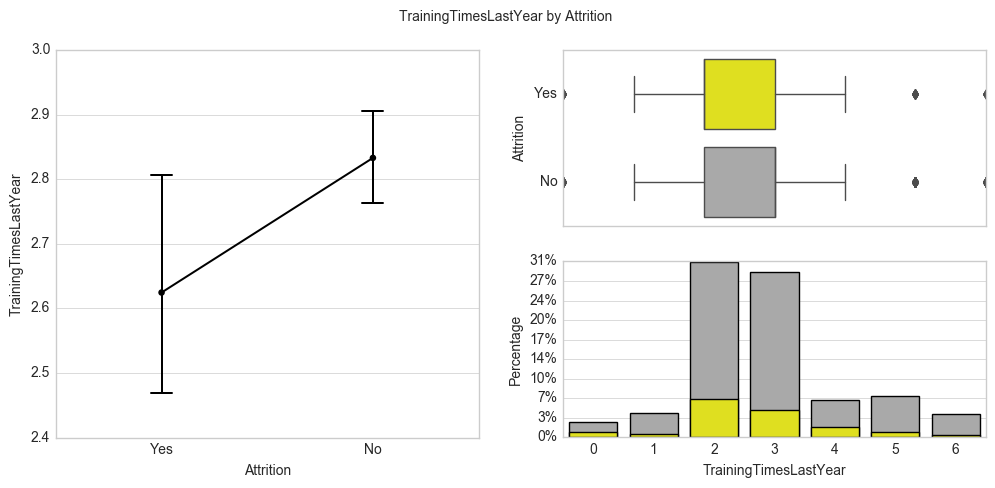

,z-test statistic,p-value
Attrition,-2.28,0.02


Attrition == Yes Mean: 2.62 (+/- 1.25)
Attrition == No Mean : 2.83 (+/- 2.83)
Absolute Mean Diferrence Distance: 0.21


In [29]:
display_cxn_analysis(data, target, next(i), "Yes")

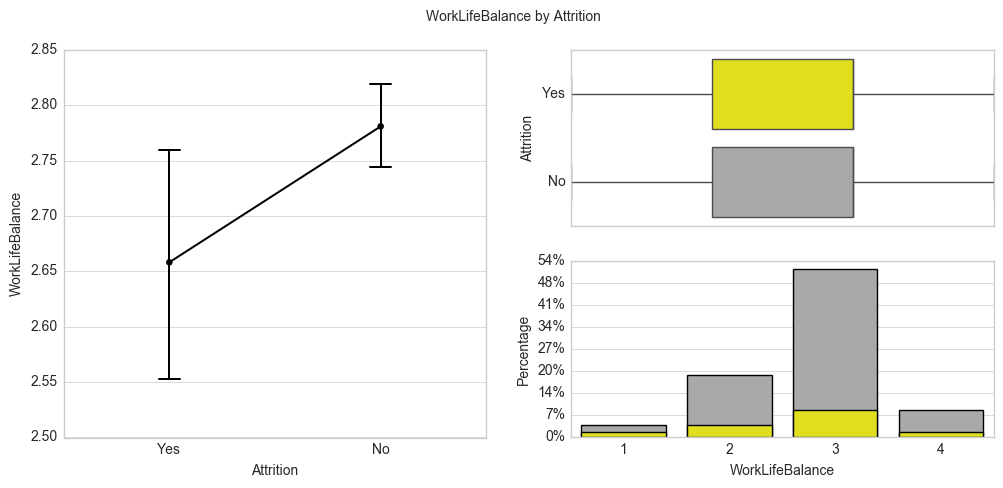

,z-test statistic,p-value
Attrition,-2.45,0.01


Attrition == Yes Mean: 2.66 (+/- 0.82)
Attrition == No Mean : 2.78 (+/- 2.78)
Absolute Mean Diferrence Distance: 0.12


In [30]:
display_cxn_analysis(data, target, next(i), "Yes")

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


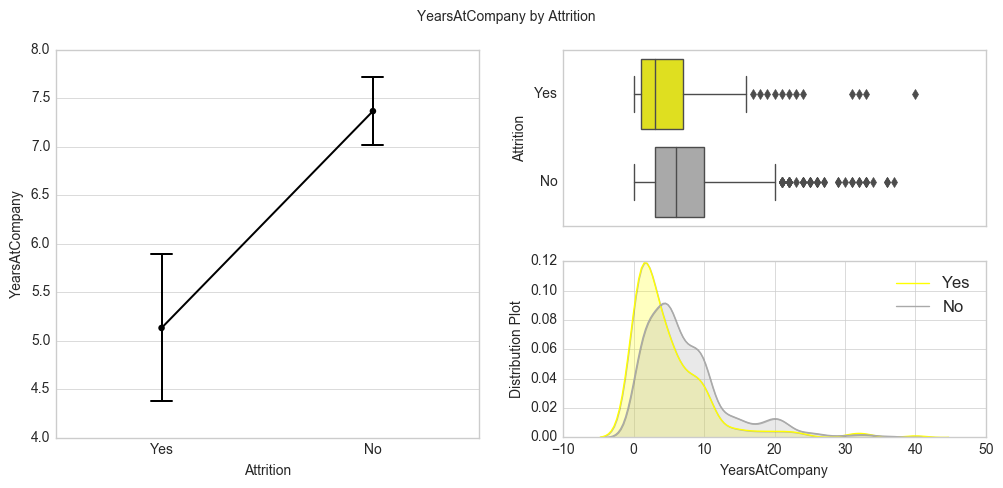

,z-test statistic,p-value
Attrition,-5.2,0.0


Attrition == Yes Mean: 5.13 (+/- 5.95)
Attrition == No Mean : 7.37 (+/- 7.37)
Absolute Mean Diferrence Distance: 2.24


In [31]:
display_cxn_analysis(data, target, next(i), "Yes")

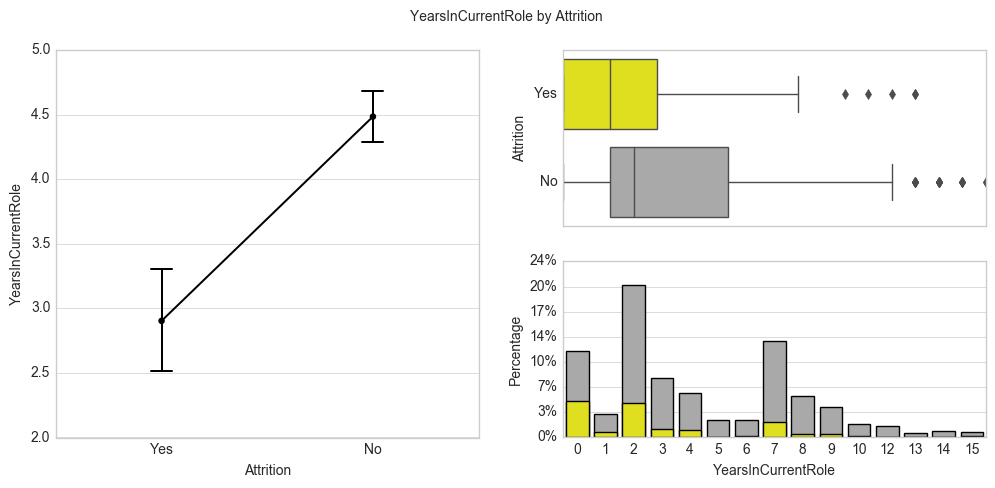

,z-test statistic,p-value
Attrition,-6.23,0.0


Attrition == Yes Mean: 2.90 (+/- 3.17)
Attrition == No Mean : 4.48 (+/- 4.48)
Absolute Mean Diferrence Distance: 1.58


In [32]:
display_cxn_analysis(data, target, next(i), "Yes")

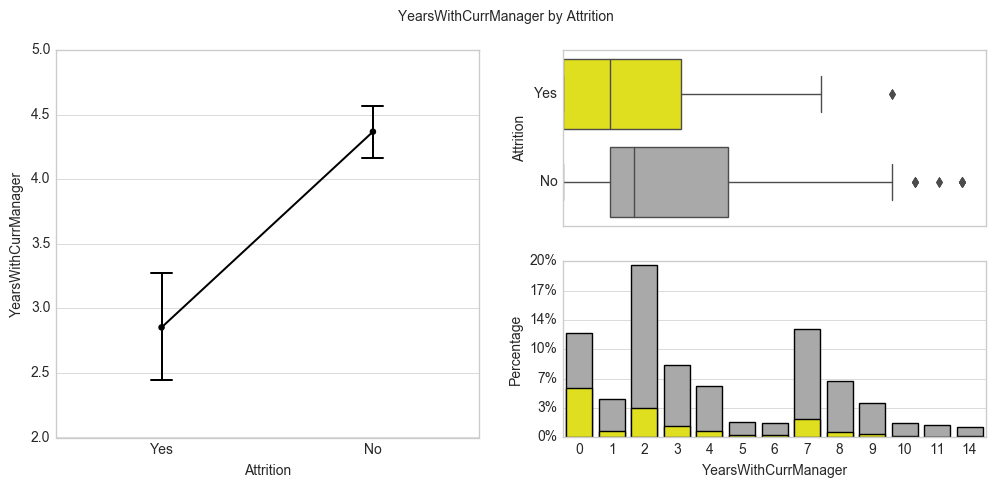

,z-test statistic,p-value
Attrition,-6.06,0.0


Attrition == Yes Mean: 2.85 (+/- 3.14)
Attrition == No Mean : 4.37 (+/- 4.37)
Absolute Mean Diferrence Distance: 1.52


In [33]:
display_cxn_analysis(data, target, next(i), "Yes")

Education


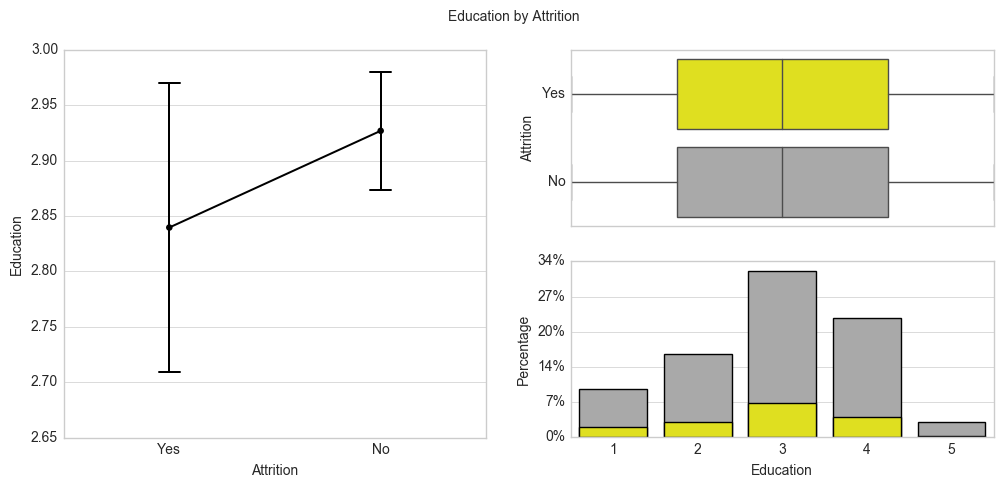

,z-test statistic,p-value
Attrition,-1.2,0.23


Attrition == Yes Mean: 2.84 (+/- 1.01)
Attrition == No Mean : 2.93 (+/- 2.93)
Absolute Mean Diferrence Distance: 0.09
HourlyRate


C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


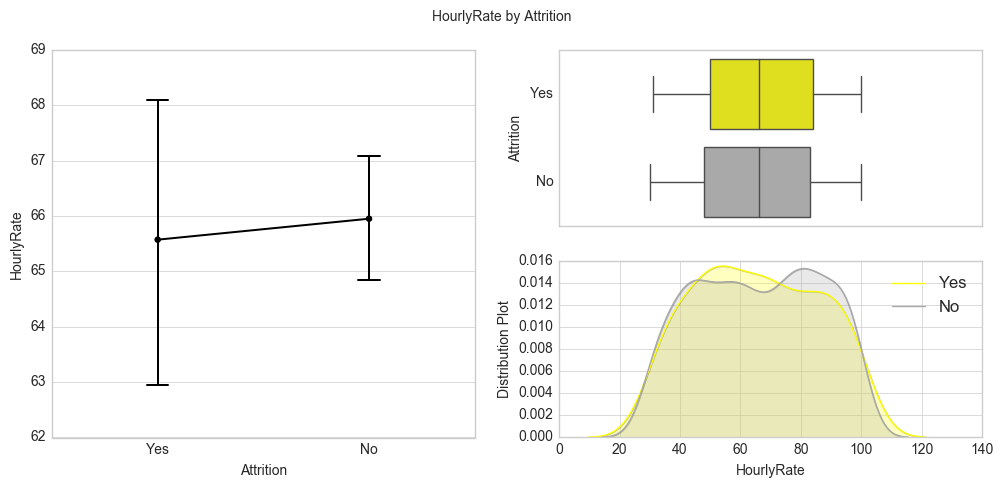

,z-test statistic,p-value
Attrition,-0.26,0.79


Attrition == Yes Mean: 65.57 (+/- 20.10)
Attrition == No Mean : 65.95 (+/- 65.95)
Absolute Mean Diferrence Distance: 0.38
MonthlyRate


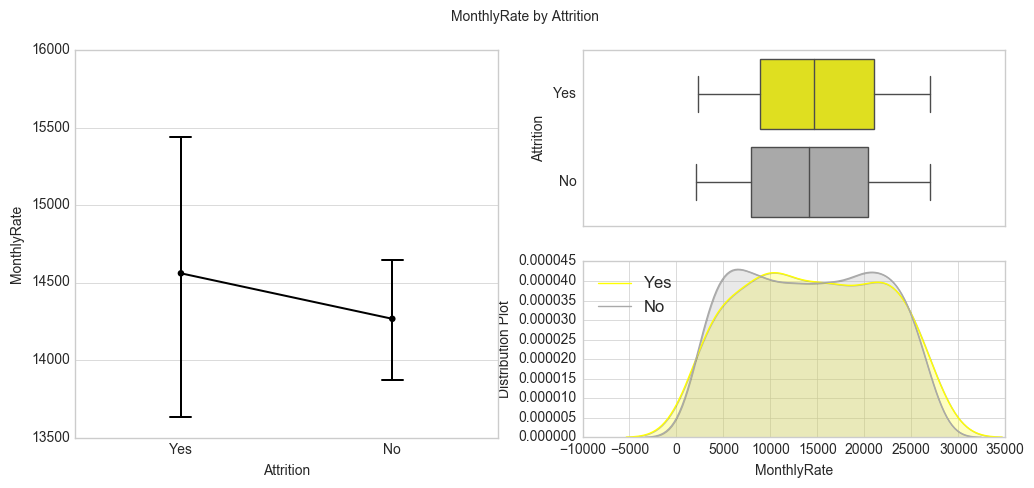

,z-test statistic,p-value
Attrition,0.58,0.56


Attrition == Yes Mean: 14559.31 (+/- 7208.15)
Attrition == No Mean : 14265.78 (+/- 14265.78)
Absolute Mean Diferrence Distance: 293.53
NumCompaniesWorked


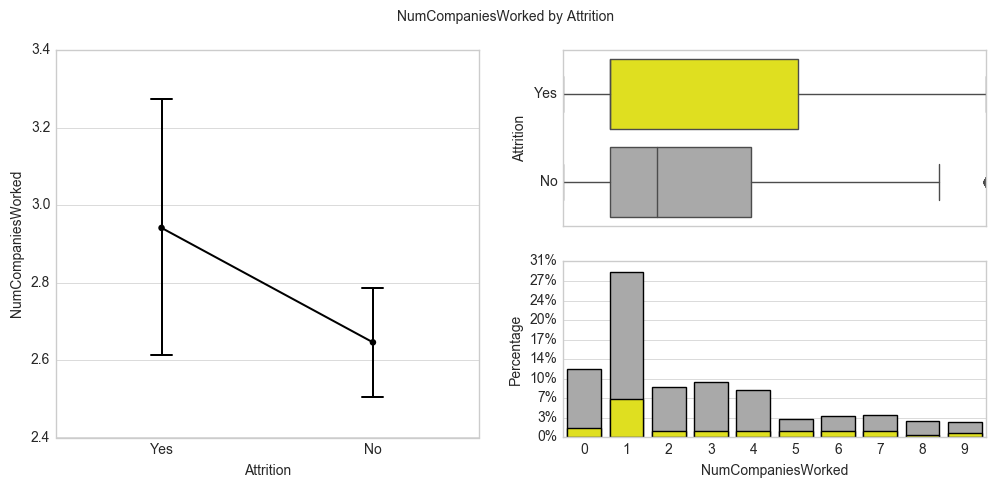

,z-test statistic,p-value
Attrition,1.67,0.1


Attrition == Yes Mean: 2.94 (+/- 2.68)
Attrition == No Mean : 2.65 (+/- 2.65)
Absolute Mean Diferrence Distance: 0.30
PercentSalaryHike


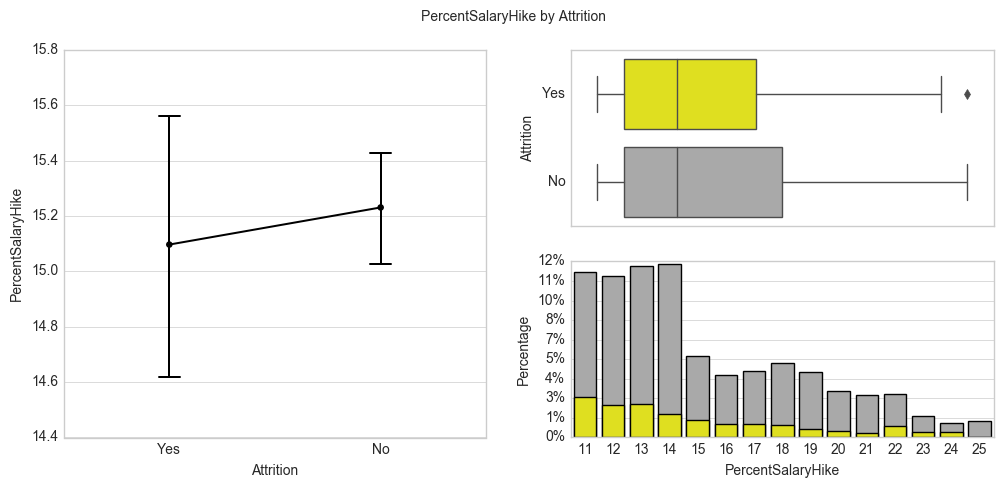

,z-test statistic,p-value
Attrition,-0.52,0.61


Attrition == Yes Mean: 15.10 (+/- 3.77)
Attrition == No Mean : 15.23 (+/- 15.23)
Absolute Mean Diferrence Distance: 0.13
PerformanceRating


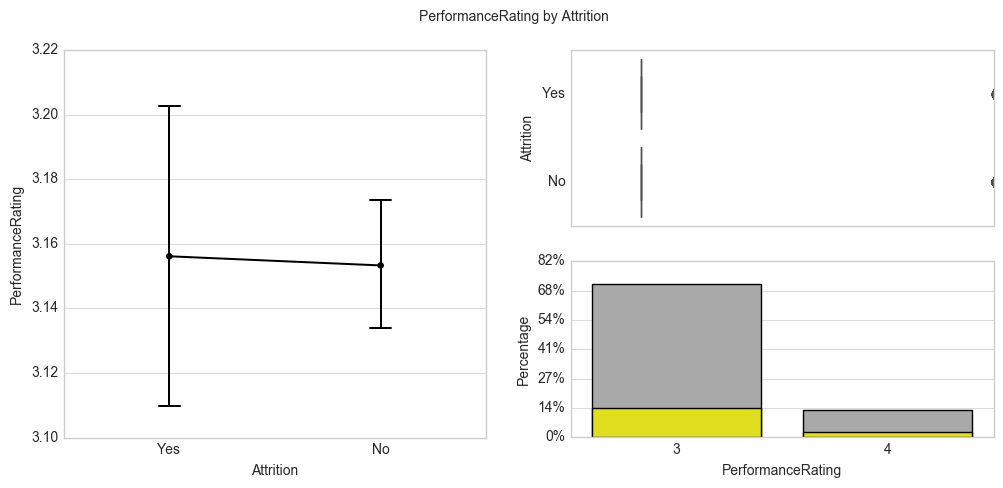

,z-test statistic,p-value
Attrition,0.11,0.91


Attrition == Yes Mean: 3.16 (+/- 0.36)
Attrition == No Mean : 3.15 (+/- 3.15)
Absolute Mean Diferrence Distance: 0.00
RelationshipSatisfaction


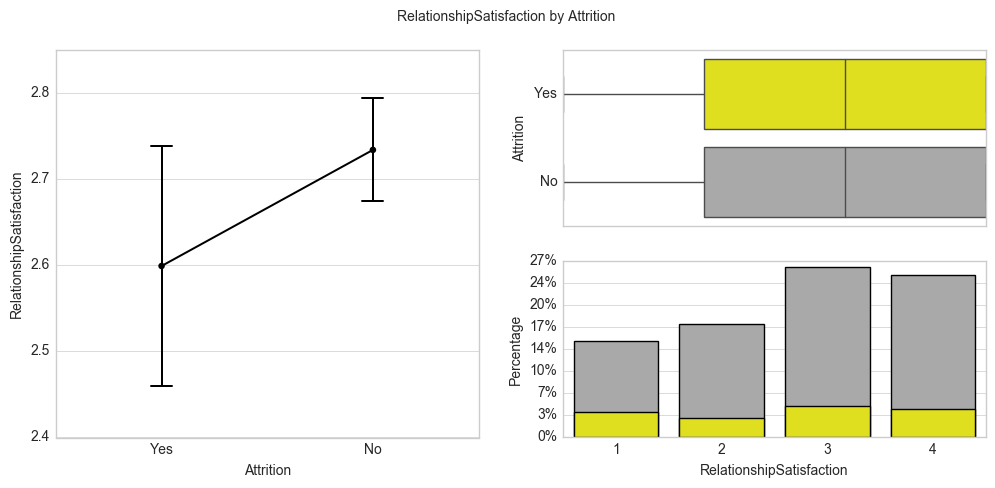

,z-test statistic,p-value
Attrition,-1.76,0.08


Attrition == Yes Mean: 2.60 (+/- 1.13)
Attrition == No Mean : 2.73 (+/- 2.73)
Absolute Mean Diferrence Distance: 0.13
YearsSinceLastPromotion


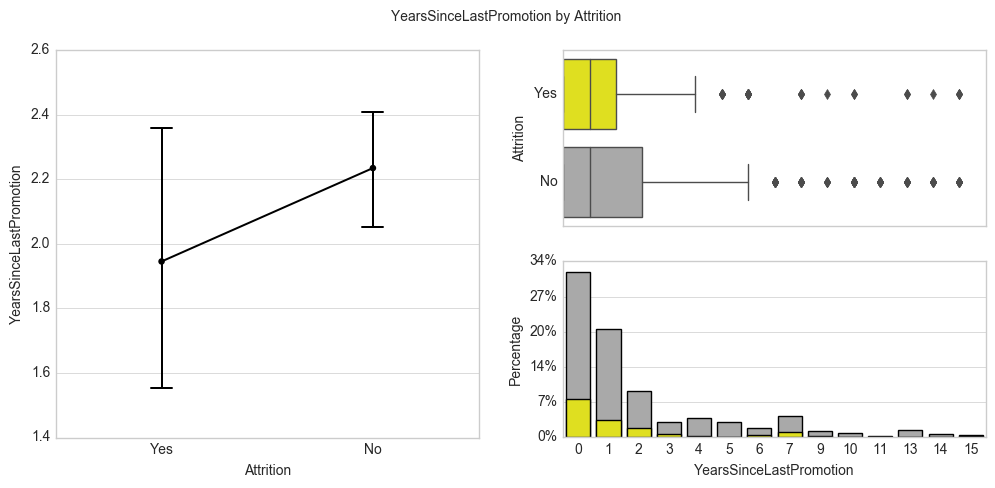

,z-test statistic,p-value
Attrition,-1.27,0.21


Attrition == Yes Mean: 1.95 (+/- 3.15)
Attrition == No Mean : 2.23 (+/- 2.23)
Absolute Mean Diferrence Distance: 0.29


In [34]:
for n in ns:
    print(n)
    
    display_cxn_analysis(data, target, n, "Yes")

## 参考
* [IBM Employee Attrition Analysis by Numerics | Kaggle](https://www.kaggle.com/slamnz/ibm-employee-attrition-analysis-by-numerics)